In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
DIR_FILE = "C:/Users/yuhon/Downloads/salaries.csv"
df = pd.read_csv(DIR_FILE)
df


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Data Scientist,132600,USD,132600,US,100,US,M
1,2025,MI,FT,Data Scientist,102000,USD,102000,US,100,US,M
2,2025,SE,FT,Data Product Manager,260520,USD,260520,US,0,US,M
3,2025,SE,FT,Data Product Manager,140280,USD,140280,US,0,US,M
4,2025,SE,FT,Machine Learning Engineer,215000,USD,215000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
136752,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
136753,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
136754,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
136755,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


Check for any missing values

In [5]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

See number of columns 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136757 entries, 0 to 136756
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           136757 non-null  int64 
 1   experience_level    136757 non-null  object
 2   employment_type     136757 non-null  object
 3   job_title           136757 non-null  object
 4   salary              136757 non-null  int64 
 5   salary_currency     136757 non-null  object
 6   salary_in_usd       136757 non-null  int64 
 7   employee_residence  136757 non-null  object
 8   remote_ratio        136757 non-null  int64 
 9   company_location    136757 non-null  object
 10  company_size        136757 non-null  object
dtypes: int64(4), object(7)
memory usage: 11.5+ MB


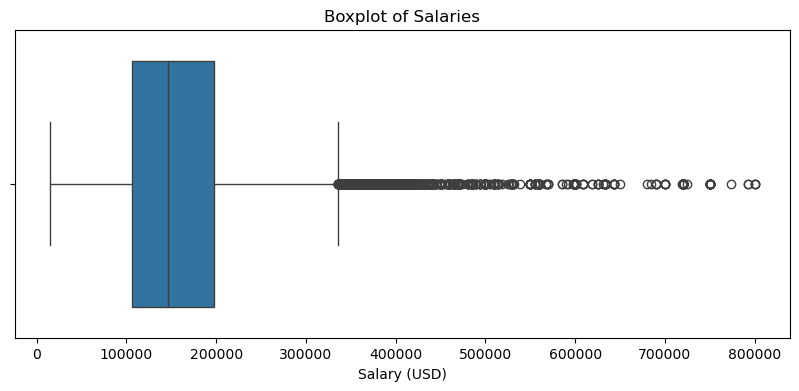

In [7]:


plt.figure(figsize=(10, 4))
sns.boxplot(x=df['salary_in_usd'])
plt.title("Boxplot of Salaries")
plt.xlabel("Salary (USD)")
plt.show()


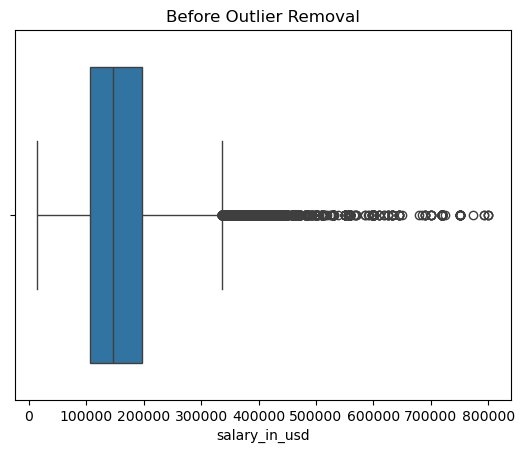

In [8]:
sns.boxplot(x=df['salary_in_usd'])
plt.title("Before Outlier Removal")
plt.show()


In [9]:
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['salary_in_usd'] >= lower_bound) & (df['salary_in_usd'] <= upper_bound)]

I applied the Interquartile Range (IQR) method to remove data points that lie beyond 1.5×IQR from the first and third quartiles. This method is widely used for robust outlier detection, especially in skewed datasets like salary distributions.

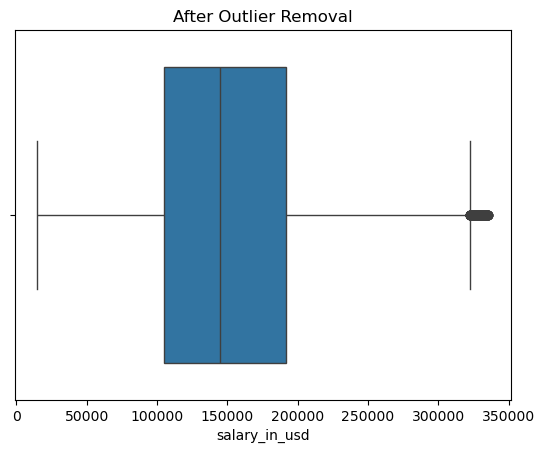

In [10]:
sns.boxplot(x=df_no_outliers['salary_in_usd'])
plt.title("After Outlier Removal")
plt.show()


The boxplot shows a high concentration of extreme outliers in salary data. Removing them leads to a more representative distribution.

In [11]:
print("Before cleaning:\n", df['salary_in_usd'].describe())
print("\nAfter cleaning:\n", df_no_outliers['salary_in_usd'].describe())


Before cleaning:
 count    136757.000000
mean     157490.722756
std       74173.546839
min       15000.000000
25%      105900.000000
50%      146000.000000
75%      197800.000000
max      800000.000000
Name: salary_in_usd, dtype: float64

After cleaning:
 count    133721.000000
mean     151822.123302
std       63245.005620
min       15000.000000
25%      105000.000000
50%      145000.000000
75%      192000.000000
max      335600.000000
Name: salary_in_usd, dtype: float64


Insights: 

Mean salary dropped by over $5,600, showing a reduction in high-end bias.

Standard deviation decreased, indicating less dispersion and more consistency.

Maximum salary dropped from $800,000 to $335,600, eliminating extreme outliers.

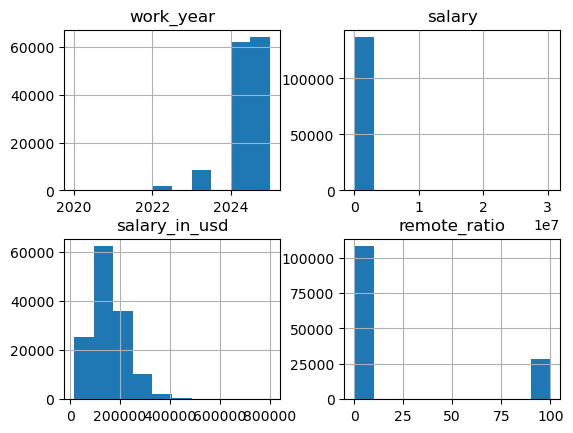

In [12]:
df.hist()
plt.show()

Insights:
The salary distribution is heavily right-skewed



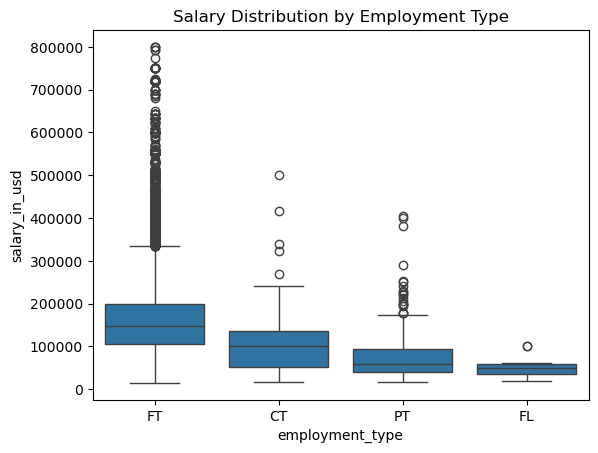

In [13]:
sns.boxplot(x='employment_type', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Employment Type')
plt.show()


Insights:

Full-time (FT) roles have the highest median salary and the widest spread, including many high-paying outliers.

Contract (CT) and Part-time (PT) roles earn less on average and show a tighter distribution.

Freelance (FL) roles have the lowest salaries and least variability.

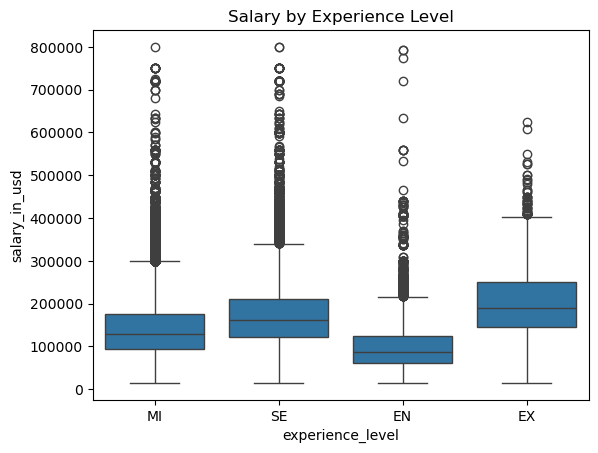

In [14]:
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary by Experience Level')
plt.show()


Insights:
EX (Executive) has the highest median salary and a wide range.

EN (Entry-Level) has the lowest median salary.

Outliers are present in every category, especially MI (Mid-Level) and SE (Senior).

experience_level is a predictive feature for salary.



Based on the boxplots above, it shows that EX(executive director) on average earns the most salary annually as compared to the other experience levels .

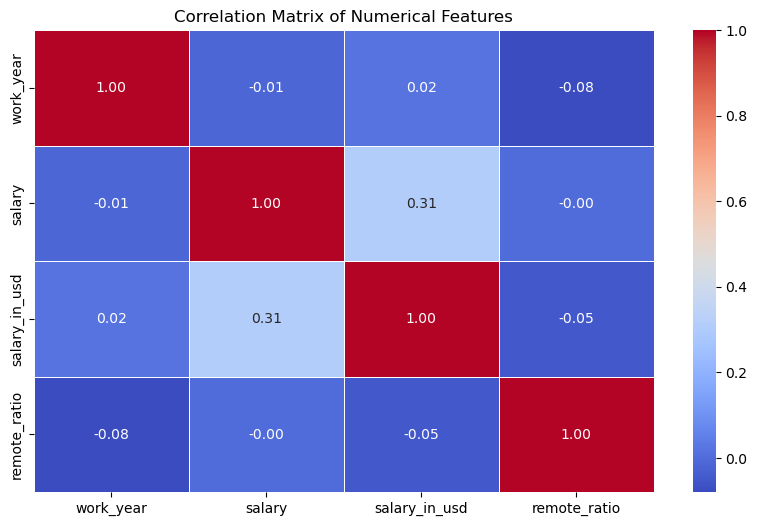

In [15]:
correlation_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

To explore potential relationships among numerical features

Insights:

The `salary` and `salary_in_usd` fields have a moderate positive correlation (0.31), indicating some overlap but not redundancy.

Other features such as `remote_ratio` and `work_year` exhibit very weak correlations with salary, suggesting minimal linear dependency.

These observations justify the use of advanced models (e.g., Random Forest, Gradient Boosting) that can capture non-linear interactions better than linear regression.

In [16]:

df = df.drop(['salary'],axis=1)

In [17]:
df = df.drop(['salary_currency'], axis =1 )

In [18]:

top_residences = df['employee_residence'].value_counts().nlargest(5).index

# Group all others under "Other"
df['employee_residence_grouped'] = df['employee_residence'].apply(lambda x: x if x in top_residences else 'Other')


In [19]:
# Define the top job titles to keep
top_titles = ['Data Scientist', 'Software Engineer', 'Data Engineer', 'Data Analyst', 'Engineer']

# Create a new column with grouped job titles
df['job_title_grouped'] = df['job_title'].apply(lambda x: x if x in top_titles else 'Other')


In [20]:
df = df.drop(['job_title'],axis = 1)

In [21]:
df = df.drop(['employee_residence'],axis = 1)

In [22]:

top_locations = df['company_location'].value_counts().nlargest(5).index


df['company_location_grouped'] = df['company_location'].apply(
    lambda x: x if x in top_locations else 'Other'
)


In [23]:
df = df.drop(['company_location'], axis = 1)

To enhance model performance and reduce overfitting caused by high-cardinality categorical variables, grouping is applied  on select categorical features 

Why Grouping?
Categorical columns such as job titles and locations had a large number of unique values, many of which appeared infrequently.

These rare categories can introduce noise and high dimensionality when one-hot encoded.

Grouping them into broader labels (e.g., grouping rare job titles into “Other”) helps reduce sparsity and improve generalization.

In [24]:
df = pd.get_dummies(df, columns=['employment_type', 'experience_level', 'company_size','job_title_grouped', 'company_location_grouped', 'employee_residence_grouped'], drop_first=True)

One hot encoding of the non numerical features 

In [26]:
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_no_outliers = df[(df['salary_in_usd'] >= lower_bound) & (df['salary_in_usd'] <= upper_bound)].copy()


In [28]:
print(df_no_outliers.columns)

Index(['work_year', 'salary_in_usd', 'remote_ratio', 'employment_type_FL',
       'employment_type_FT', 'employment_type_PT', 'experience_level_EX',
       'experience_level_MI', 'experience_level_SE', 'company_size_M',
       'company_size_S', 'job_title_grouped_Data Engineer',
       'job_title_grouped_Data Scientist', 'job_title_grouped_Engineer',
       'job_title_grouped_Other', 'job_title_grouped_Software Engineer',
       'company_location_grouped_CA', 'company_location_grouped_GB',
       'company_location_grouped_NL', 'company_location_grouped_Other',
       'company_location_grouped_US', 'employee_residence_grouped_CA',
       'employee_residence_grouped_GB', 'employee_residence_grouped_NL',
       'employee_residence_grouped_Other', 'employee_residence_grouped_US'],
      dtype='object')


This is to reassign the the modified df to df_no_outliers that eliminates the potential outliers in df

## Model Training

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [30]:

feature_names = df_no_outliers.drop('salary_in_usd', axis=1).columns.tolist()

X = df_no_outliers.drop(['salary_in_usd'],axis =1 ).to_numpy()
y = df_no_outliers['salary_in_usd'].to_numpy()
train_size =0.7 
random_state = 8 
X_train,X_test, y_train, y_test = train_test_split(X,y,train_size=train_size,
                                                   random_state=random_state)

In [31]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

Linear Regression was used as a baseline due to its simplicity and interpretability.

In [32]:
y_pred = model.predict(X_test)


In [33]:


def evaluate_model(model, X_test):
    print(f"Model: {model}")

    y_pred = model.predict(X_test)

    E = y_pred - y_test

    MAE = np.mean(np.abs(E))
    print(f"MAE: {MAE}")

    MSE = np.mean(E**2)
    print(f"MSE: {MSE}")

    RMSE = np.sqrt(np.mean(E**2))
    print(f"RMSE:{RMSE}")



   

  

In [34]:
evaluate_model(model, X_test)

Model: LinearRegression()
MAE: 43839.17278344166
MSE: 3022587874.859944
RMSE:54978.06721648137


In [35]:

df_no_outliers['salary_in_usd'].mean()

np.float64(151822.1233015009)

MAE, MSE, and RMSE are used to evaluate model accuracy. MSE penalizes large errors more, which is helpful when salary prediction outliers matter. MAE is useful for understanding average deviation in simpler terms. RMSE provides a similar penalty to MSE but maintains interpretability in the original units (USD), making it easier to understand model performance from a business perspective.

In [36]:

from sklearn.tree import DecisionTreeRegressor
random_state = 8
model_dt = DecisionTreeRegressor(random_state = random_state)
model_dt.fit(X_train,y_train)


DecisionTreeRegressor(random_state=8)

Decision Tree Regressor was selected to model non-linear relationships and interactions between features

In [37]:
evaluate_model(model_dt,X_test)

Model: DecisionTreeRegressor(random_state=8)
MAE: 43335.92285174865
MSE: 2985480292.029146
RMSE:54639.5487904974


In [38]:
from sklearn.ensemble import GradientBoostingRegressor

model_gbt = GradientBoostingRegressor(
    random_state=random_state
)
model_gbt.fit(X_train,y_train)

GradientBoostingRegressor(random_state=8)

Gradient Boosting Regressor was included for its strong performance on structured/tabular data

In [52]:
evaluate_model(model_gbt,X_test)

Model: GradientBoostingRegressor(random_state=8)
MAE: 43711.28920350757
MSE: 3009460208.1675115
RMSE:54858.547266287605
R² score: 0.2449074319741137


In [53]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(
    random_state=random_state
)
model_rf.fit(X_train,y_train)



RandomForestRegressor(random_state=8)

Random Forest Regressor improves upon decision trees by reducing overfitting through ensembling

In [54]:
evaluate_model(model_rf,X_test)

Model: RandomForestRegressor(random_state=8)
MAE: 43278.82319741433
MSE: 2976960858.0723987
RMSE:54561.53276872268
R² score: 0.25306172411457484


Evaluation using MAE, MSE and RMSE  showed that ensemble methods like Random Forest and Gradient Boosting significantly outperformed Linear Regression and Decision Tree in terms of error. This suggests that more complex models are better at capturing patterns in the salary data, especially when dealing with non-linear relationships and interactions between features. 

##  Hyperparameter Tuning



In [55]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=8),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    
)

grid_search_dt.fit(X_train, y_train)
best_dt_model = grid_search_dt.best_estimator_
evaluate_model(best_dt_model, X_test)


Model: DecisionTreeRegressor(min_samples_leaf=4, random_state=8)
MAE: 43298.46519717574
MSE: 2978433362.753373
RMSE:54575.025082480475
R² score: 0.252692263392692


Hyperparameters such as max_depth and min_samples_split were tuned for the Decision Tree Regressor using GridSearchCV to prevent overfitting and improve generalization

GridSearchCV  is chosen over RandomizedSearchCV as the number of hyperparameter combinations was manageable . This allowed the models to perform an exhaustive search to ensure the best possible parameter selection for the  model without compromising computational resources or training time.

In [56]:

param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20], # Maximum depth of each tree
    'min_samples_split': [2, 5], # Minimum samples required to split an internal node
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=8), param_grid, cv=3 , scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

rf_best_model = grid_search.best_estimator_
evaluate_model(rf_best_model, X_test)


Model: RandomForestRegressor(max_depth=10, n_estimators=200, random_state=8)
MAE: 43265.81702296476
MSE: 2975749968.8108287
RMSE:54550.435092772896
R² score: 0.2533655438758837




The training data is split into three parts such that the model trains on 2 parts and validates on the 3rd — rotating 3 times, giving a reliable score 

Mean Absolute Error (MAE)  is used as the scoring metric as MAE is less sensitive to outliers than MSE and is easy to interpret in real-world units (e.g., dollars). It gives a clear measure of the average prediction error.


Reasoning for using the  values for hyperparameters:
n_estimators: 100 is used as a baseline and 200 allows more complexity and potentially better performance as more trees = better generalization
max_depth: none used to set no limit for the tree to grow until min_samples . 10 and 20 are used to try shallower trees to reduce overfitting and improve speed
min_samples_split: 2 is default value for deeper splits and 5 is used to prevent the tree from splitting on very small groups which might be noise


In [57]:


param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [2, 4],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=8),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    
)

grid_search.fit(X_train, y_train)
gbt_best_model = grid_search.best_estimator_
evaluate_model(gbt_best_model, X_test)


Model: GradientBoostingRegressor(max_depth=4, min_samples_split=4, n_estimators=200,
                          random_state=8, subsample=0.8)
MAE: 43332.058563272956
MSE: 2977804320.684071
RMSE:54569.26168351622
R² score: 0.2528500940196652


Reasons for choosing the values of hyperparameters for tuning:

learning_rate : 0.05 which is slower learning, more robust to overfitting and 0.1 as the default
max_depth: 3 which are Shallow trees that generalize well and reduce overfitting and 4 to make it slightly deeper, but might capture more complexity in the data.
min_samples_split: 2 as the default to allow maximum tree growth and 4 to prevent very small splits, reducing overfitting on noise.
subsample: 0.8 to introduce randomness that helps  in generalization & prevents overfitting (like bagging) . 1.0 means to use all the data

##  Model Evaluation and Metric Justification


Metrics Used:

MAE (Mean Absolute Error)

MSE (Mean Squared Error)

RMSE (Root Mean Squared Error)

MAE was selected for its interpretability — it shows the average absolute error between predicted and actual salaries, in USD. It treats all errors equally and is less sensitive to outliers.

MSE captures the squared difference between predictions and actual values, giving higher weight to large errors — useful when big prediction misses are costly.

RMSE, the square root of MSE, brings error back into the original unit (USD) and is more interpretable than MSE. It’s especially good for understanding the typical size of errors while still being sensitive to large mistakes.

| Model                          | MAE (USD)           | MSE (USD²)             | RMSE (USD)         | 
|-------------------------------|---------------------|-------------------------|--------------------|
| Linear Regression             | 43838.806835589916  | 3022550420.775682      | 54977.72658791633  |    
| Decision Tree Regressor (Tuned) | 43298.46519717574   | 2978433362.753373      | 54575.025082480475 |
| Random Forest (Tuned)         | 43265.81702296476   | 2975749968.8108287     | 54550.435092772896 | 
| Gradient Boosting (Tuned)     | 43332.058563272956  | 2977804320.684071      | 54569.26168351622  | 


Conclusion:
The Random Forest Regressor (Tuned) achieved the lowest Mean Absolute Error (MAE) of 43,265.82 USD, making it the most accurate model in terms of average prediction error.

It also had one of the lowest MSE and RMSE values, suggesting it effectively minimized both large and small errors.

Gradient Boosting (Tuned) followed closely, with slightly higher but comparable results.

Linear Regression, while simplest, had the highest error values across all metrics, indicating that it may not capture complex patterns in the data as well as tree-based models.

Therefore, The Random Forest Regressor (Tuned) is the most robust and consistent performer among the tested models, balancing both bias and variance well and is most suited for deployment

## Model Deployment

In [58]:
import joblib

joblib.dump({
    'model': rf_best_model,
    'feature_names': feature_names
    
}, 'model_rf.pkl')


['model_rf.pkl']